[![Labellerr](https://storage.googleapis.com/labellerr-cdn/%200%20Labellerr%20template/notebook.webp)](https://www.labellerr.com)

# **Vehicle Number Plate Recogniton using CV**

---

[![labellerr](https://img.shields.io/badge/Labellerr-BLOG-black.svg)](https://www.labellerr.com/blog)
[![Youtube](https://img.shields.io/badge/Labellerr-YouTube-b31b1b.svg)](https://www.youtube.com/@Labellerr)
[![Github](https://img.shields.io/badge/Labellerr-GitHub-green.svg)](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)

## Dataset Preparation

In [35]:
# !git clone https://github.com/Labellerr/yolo_finetune_utils.git

In [ ]:
from yolo_finetune_utils.frame_extractor import extract_random_frames

extract_random_frames(
        paths=[r"videos\traffic_dataset"],
        total_images=150,
        out_dir="traffic_dataset_frames",
        jpg_quality=100,
        seed=42
    )

## Annotate your Custom dataset using Labellerr

 ***1. Visit the [Labellerr](https://www.labellerr.com/?utm_source=githubY&utm_medium=social&utm_campaign=github_clicks) website and click **“Sign Up”**.*** 

 ***2. After signing in, create your workspace by entering a unique name.***

 ***3. Navigate to your workspace’s API keys page (e.g., `https://<your-workspace>.labellerr.com/workspace/api-keys`) to generate your **API Key** and **API Secret**.***

 ***4. Store the credentials securely, and then use them to initialise the SDK or API client with `api_key`, `api_secret`.*** 


### Use Labellerr SDK for uploading and perform annotation of your own dataset

In [ ]:
# uncomment the following lines to install required packages in a Jupyter notebook environment

# !pip install git+https://github.com/Labellerr/SDKPython.git
# !pip install ipyfilechooser
# !git clone https://github.com/Labellerr/yolo_finetune_utils.git

In [ ]:
# all the imports required for this notebook
from labellerr.client import LabellerrClient
from labellerr.core.datasets import create_dataset_from_local
from labellerr.core.annotation_templates import create_template
from labellerr.core.projects import create_project
from labellerr.core.schemas import DatasetConfig, AnnotationQuestion, QuestionType, CreateTemplateParams, DatasetDataType, CreateProjectParams, RotationConfig
from labellerr.core.projects import LabellerrProject
from labellerr.core.exceptions import LabellerrError

import uuid
from ipyfilechooser import FileChooser

In [ ]:
api_key = input("YOUR_API_KEY")        # go to labellerr workspace to get your API key
api_secret = input("YOUR_API_SECRET")  # go to labellerr workspace to get your API secret
client_id = input("YOUR_CLIENT_ID")   # Contact labellerr support to get your client ID i.e. support@tensormatics.com

client = LabellerrClient(api_key, api_secret, client_id)


### ***STEP-1: Create a dataset on labellerr from your local folder***

The SDK supports in creating dataset by uploading local files. 

In [ ]:
# Create a folder chooser starting from a directory (for example, your home directory)
chooser = FileChooser('/')

# Set the chooser to folder selection mode only
chooser.title = 'Select a folder containing your dataset'
chooser.show_only_dirs = True

# Display the widget
display(chooser)

FileChooser(path='D:\', filename='', title='Select a folder containing your dataset', show_hidden=False, selec…

In [ ]:
path_to_dataset = chooser.selected_path
print("You selected:", path_to_dataset)

You selected: D:\Professional\Projects\Cell_Segmentation_using_YOLO\frames_output


In [ ]:
my_dataset_type = input("Enter your dataset type (video or image): ").lower()
print("Selected dataset type:", my_dataset_type)

Selected dataset type: video


In [ ]:
dataset = create_dataset_from_local(
    client=client,
    dataset_config=DatasetConfig(dataset_name="My Dataset", data_type="image"),
    folder_to_upload=path_to_dataset
)

print(f"Dataset created with ID: {dataset.dataset_id}")


### ***STEP-2: Create annotation project on labellerr of your created dataset***

Create a annotation project of your uploaded dataset to start performing annotation on labellerr UI

In [ ]:
# Create annotation guideline template for video annotation project (like classes to be annotated)

template = create_template(
    client=client,
    params=CreateTemplateParams(
        template_name="My Template",
        data_type=DatasetDataType.image,
        questions=[
            AnnotationQuestion(
                question_number=1,
                question="Object",
                question_id=str(uuid.uuid4()),
                question_type=QuestionType.polygon,
                required=True,
                color="#FF0000"
            )
        ]
    )
)
print(f"Annotation template created with ID: {template.annotation_template_id}")


In [ ]:
dataset.status()        # wait until dataset is processed before creating project

project = create_project(
    client=client,
    params=CreateProjectParams(
        project_name="My Project",
        data_type=DatasetDataType.image,
        rotations=RotationConfig(
            annotation_rotation_count=1,
            review_rotation_count=1,
            client_review_rotation_count=1
        )
    ),
    datasets=[dataset],
    annotation_template=template
)

print(f"✓ Project created: {project.project_id}")

Your project has been created now go to labellerr platform to perform annotation 

***click to go to labellerr.com***

[![Labellerr](https://cdn.labellerr.com/1%20%20Documentation/1c9dc7ce-9a54-4111-8fd5-0363ba3e00e1.webp)](https://www.labellerr.com/?utm_source=githubY&utm_medium=social&utm_campaign=github_clicks)
Open the project you created (Projects → select your project).

Click Start Labeling to open the annotation interface. Use the configured labeling tools (bounding boxes, polygon, dot, classification, etc.) to annotate files.
### ***STEP-3: Export your annotation in required format***

Generate a temporary download URL to retrieve your exported JSON file:

### Export Configuration Parameters

| Parameter | Type | Description |
|-----------|------|-------------|
| `export_name` | string | Display name for the export |
| `export_description` | string | Description of what this export contains |
| `export_format` | string | Output format (e.g., `json`, `xml`, `coco`) |
| `statuses` | list | Annotation statuses to include in export |

### Common Annotation Statuses

- **`review`**: Annotations pending review
- **`r_assigned`**: Review assigned to a reviewer
- **`client_review`**: Under client review
- **`cr_assigned`**: Client review assigned
- **`accepted`**: Annotations accepted and finalized

---

In [ ]:
export_config = {
    "export_name": "Weekly Export",
    "export_description": "Export of all accepted annotations",
    "export_format": "coco_json",
    "statuses": ['review', 'r_assigned','client_review', 'cr_assigned','accepted']
}

try:
    # Get project instance
    project = LabellerrProject(client=client, project_id=project.project_id)
    
    # Create export
    result = project.create_local_export(export_config)
    export_id = result["response"]['report_id']
    print(f"Local export created successfully. Export ID: {export_id}")
except LabellerrError as e:
    print(f"Local export creation failed: {str(e)}")
    
    
try:
    download_url = client.fetch_download_url(
        project_id=project.project_id,
        uuid=str(uuid.uuid4()),
        export_id=export_id
    )
    print(f"Download URL: {download_url}")
except LabellerrError as e:
    print(f"Failed to fetch download URL: {str(e)}")


Now you can download your annotations locally using given URL

## Convert COCO Annotations to YOLO Format
Transform the COCO JSON annotation format to YOLO format and organize the dataset for training with proper directory structure.

In [ ]:
from yolo_finetune_utils.coco_yolo_converter.seg_converter import coco_to_yolo_converter

ANNOTATION_JSON = "annotations.json"
IMAGE_DIR = "traffic_dataset_frames"


coco_to_yolo_converter(
        json_path=ANNOTATION_JSON,
        images_dir=IMAGE_DIR,
        output_dir="yolo_dataset",
        use_split=True,
        train_ratio=0.7,
        val_ratio=0.2,
        test_ratio=0.1,
        shuffle=True,
        verbose=False
    )

## Train YOLO Segmentation Model
Fine-tune the YOLOv11m segmentation model on the vehicle number plate dataset for 300 epochs with GPU acceleration.

In [ ]:
from ultralytics import YOLO
# Load a model
model = YOLO("yolo11m-seg.pt")

# Train the model
results = model.train(
    data=r"yolo_dataset\data.yaml",    # Path to your dataset YAML file
    epochs=300,                        # Number of training epochs
    imgsz=640,                         # Image size
    batch=-1,                          # Batch size
    device=0,                          # GPU device (0 for first GPU, 'cpu' for CPU)
    workers=4                          # Number of dataloader workers
)

In [36]:
MODEL_PATH = r"runs/segment/train/weights/best.pt"

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL_PATH)

video_path = r"traffic_dataset\traffic_3.mp4"

results = model.track(video_path, save=True, conf=0.4, stream=True, show_labels=False)
for r in results:
    pass

## **Tesseract OCR based Vehicle Plate Recognition**

In [38]:
import cv2
import pytesseract
import easyocr
from ultralytics import YOLO
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np

### **Inference on a Frame**

In [39]:
def tesseract_ocr_on_frame(image_path, model_path=MODEL_PATH):
    """
    Detect license plate using YOLO, perform Tesseract OCR, and display it using matplotlib.
    
    Parameters:
    -----------
    image_path : str
        Path to the image containing a license plate
    model_path : str
        Path to the YOLO model weights file
    
    Returns:
    --------
    dict
        Dictionary containing total plates detected and individual plate results
    """
    # Check if model path exists
    import os
    if not os.path.exists(model_path):
        print(f"Error: Model path not found: {model_path}")
        return None
    
    # Load YOLO model
    print(f"Loading YOLO model from {model_path}...")
    model = YOLO(model_path)
    
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image from {image_path}")
        return None
    
    # Convert BGR to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    annotated_img = img_rgb.copy()
    
    # Run YOLO detection
    print("Detecting license plates...")
    results = model(img, conf=0.4, verbose=False)
    
    all_plate_results = []
    
    if results[0].boxes is not None and len(results[0].boxes) > 0:
        print(f"Found {len(results[0].boxes)} license plate(s)")
        
        for idx, box in enumerate(results[0].boxes):
            # Get bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            
            # Ensure coordinates are within frame bounds
            height, width = img_rgb.shape[:2]
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(width, x2), min(height, y2)
            
            # Crop license plate region
            plate_img = img[y1:y2, x1:x2]  # Use BGR for tesseract
            
            if plate_img.size == 0:
                continue
            
            # Preprocess for Tesseract
            gray_plate = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
            _, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            
            # Perform OCR on the cropped plate
            print(f"Performing OCR on plate {idx + 1}...")
            try:
                ocr_data = pytesseract.image_to_data(
                    thresh_plate, 
                    config='--psm 7', 
                    output_type=pytesseract.Output.DICT
                )
                
                text_parts = []
                confidences = []
                
                for j, conf in enumerate(ocr_data['conf']):
                    if conf != -1 and ocr_data['text'][j].strip():
                        text_parts.append(ocr_data['text'][j])
                        confidences.append(float(conf))
                
                if text_parts:
                    plate_text = ' '.join(text_parts).strip()
                    plate_confidence = sum(confidences) / len(confidences)
                else:
                    plate_text = "No text detected"
                    plate_confidence = 0.0
                    
            except Exception as e:
                plate_text = "OCR Error"
                plate_confidence = 0.0
                print(f"Error during OCR: {e}")
            
            all_plate_results.append({
                'text': plate_text,
                'confidence': plate_confidence,
                'bbox': (x1, y1, x2, y2)
            })
            
            # Draw bounding box around the plate
            cv2.rectangle(annotated_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw text above bbox
            if plate_text and plate_text not in ["No text detected", "OCR Error"]:
                # Calculate text background size
                (text_w, text_h), baseline = cv2.getTextSize(plate_text, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)
                
                # Draw text background (above the box)
                bg_x1 = x1
                bg_y1 = max(0, y1 - text_h - 10)
                bg_x2 = min(width, x1 + text_w)
                bg_y2 = max(0, y1)
                
                cv2.rectangle(annotated_img, (bg_x1, bg_y1), (bg_x2, bg_y2), (0, 255, 0), -1)
                
                # Put text
                text_x = x1
                text_y = max(int(text_h), y1 - 5)
                cv2.putText(annotated_img, plate_text, (text_x, text_y), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
    else:
        print("No license plates detected")
    
    # Calculate overall statistics
    if all_plate_results:
        final_text = f"{len(all_plate_results)} plate(s) detected"
        avg_confidence = sum(p['confidence'] for p in all_plate_results) / len(all_plate_results)
    else:
        final_text = "No plates detected"
        avg_confidence = 0.0
    
    # Display using matplotlib - only inference result
    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Print results
    print("\n" + "="*50)
    if all_plate_results:
        for idx, plate in enumerate(all_plate_results, 1):
            print(f"Plate {idx}: {plate['text']} (Confidence: {plate['confidence']:.2f}%)")
        print(f"\nTotal plates detected: {len(all_plate_results)}")
        print(f"Average confidence: {avg_confidence:.2f}%")
    else:
        print("No plates detected")
    print("="*50)
    

Loading YOLO model from runs/segment/train/weights/best.pt...
Detecting license plates...
Found 3 license plate(s)
Performing OCR on plate 1...
Performing OCR on plate 2...
Performing OCR on plate 3...


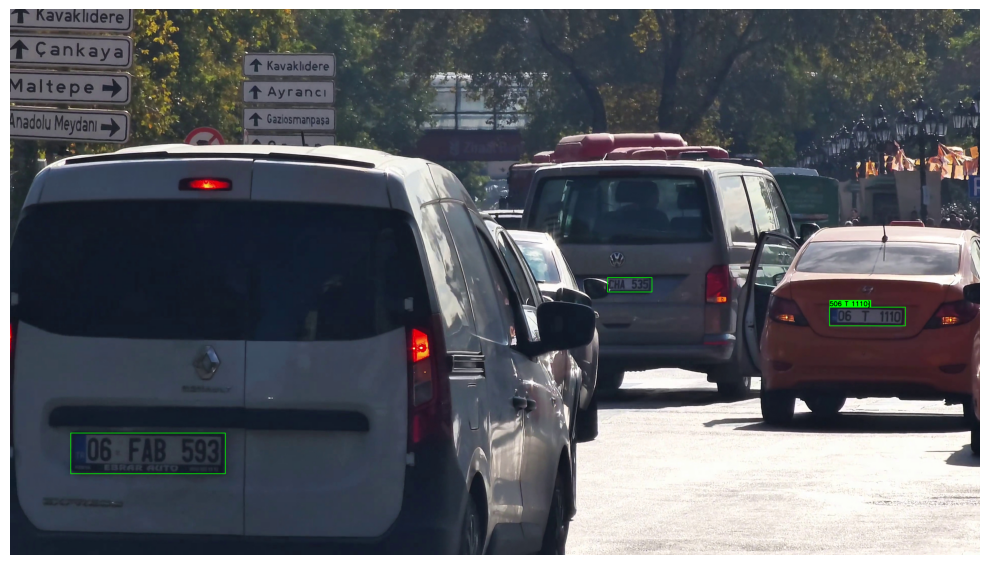


Plate 1: No text detected (Confidence: 0.00%)
Plate 2: 506 T 1110} (Confidence: 53.67%)
Plate 3: No text detected (Confidence: 0.00%)

Total plates detected: 3
Average confidence: 17.89%


In [40]:
frame_path = r"traffic_dataset_frames\traffic_1_frame_000440_t7.33s_000021.jpg"
tesseract_ocr_on_frame(frame_path)

### **Inference on a Video**

In [ ]:
def tesseract_ocr_pipeline(video_path, output_path, model_path=MODEL_PATH):
    """
    Process a video to detect license plates using YOLO and recognize text using Tesseract.
    Annotates the video with bounding boxes and recognized text.
    Maintains the highest confidence OCR result for each tracked object.
    """
    if not os.path.exists(video_path):
        print(f"Error: Video path not found: {video_path}")
        return
    if not os.path.exists(model_path):
        print(f"Error: Model path not found: {model_path}")
        return

    # Load model
    print(f"Loading model from {model_path}...")
    model = YOLO(model_path)
    
    # Capture video
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Setup video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print(f"Processing video: {video_path}")
    print(f"Output will be saved to: {output_path}")

    # Dictionary to store highest confidence OCR results for each tracked object
    # Key: track_id, Value: {'text': str, 'confidence': float}
    tracked_ocr_results = {}

    # Process frames
    # Use streaming to avoid OOM
    results = model.track(video_path, stream=True, verbose=False, conf=0.4, persist=True)
    
    for i, result in tqdm(enumerate(results), total=total_frames):
        frame = result.orig_img
        
        if result.boxes is not None:
            for box in result.boxes:
                # Get bounding box coordinates
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                
                # Get tracking ID (if available)
                track_id = None
                if box.id is not None:
                    track_id = int(box.id[0])
                
                # Crop number plate
                # Ensure coordinates are within frame bounds
                x1, y1 = max(0, x1), max(0, y1)
                x2, y2 = min(width, x2), min(height, y2)
                
                plate_img = frame[y1:y2, x1:x2]
                
                if plate_img.size == 0:
                    continue
                
                # OCR Preprocessing
                # Convert to grayscale
                gray_plate = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
                # Verify simple thresholding
                _, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                
                # Run Tesseract OCR with confidence data
                # config: --psm 7 is for a single text line
                try:
                    # Get OCR data including confidence
                    ocr_data = pytesseract.image_to_data(thresh_plate, config='--psm 7', output_type=pytesseract.Output.DICT)
                    
                    # Extract text and calculate average confidence
                    valid_confidences = []
                    text_parts = []
                    
                    for j, conf in enumerate(ocr_data['conf']):
                        if conf != -1 and ocr_data['text'][j].strip():  # Valid confidence and non-empty text
                            valid_confidences.append(float(conf))
                            text_parts.append(ocr_data['text'][j])
                    
                    if valid_confidences:
                        current_text = ' '.join(text_parts).strip()
                        current_confidence = sum(valid_confidences) / len(valid_confidences)
                    else:
                        current_text = ""
                        current_confidence = 0.0
                        
                except Exception as e:
                    print(f"OCR Error: {e}")
                    current_text = ""
                    current_confidence = 0.0
                
                # Update tracked OCR results if we have a tracking ID
                display_text = current_text
                if track_id is not None:
                    if track_id not in tracked_ocr_results:
                        # First time seeing this track_id
                        if current_text:
                            tracked_ocr_results[track_id] = {
                                'text': current_text,
                                'confidence': current_confidence
                            }
                            display_text = current_text
                        else:
                            display_text = ""
                    else:
                        # We've seen this track_id before
                        if current_confidence > tracked_ocr_results[track_id]['confidence'] and current_text:
                            # Update with higher confidence result
                            tracked_ocr_results[track_id] = {
                                'text': current_text,
                                'confidence': current_confidence
                            }
                            display_text = current_text
                        else:
                            # Keep the existing highest confidence result
                            display_text = tracked_ocr_results[track_id]['text']
                
                # Draw bbox
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                
                # Draw text above bbox
                if display_text:
                    # Calculate text background size
                    (text_w, text_h), baseline = cv2.getTextSize(display_text, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)
                    
                    # Draw text background (above the box)
                    # Ensure background doesn't go off-screen
                    bg_x1 = x1
                    bg_y1 = max(0, y1 - text_h - 10)
                    bg_x2 = min(width, x1 + text_w)
                    bg_y2 = max(0, y1)
                    
                    cv2.rectangle(frame, (bg_x1, bg_y1), (bg_x2, bg_y2), (0, 255, 0), -1)
                    
                    # Put text
                    text_x = x1
                    text_y = max(int(text_h), y1 - 5)
                    cv2.putText(frame, display_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
        
        # Write frame to video
        out.write(frame)
        
    # Release resources
    out.release()
    cap.release()
    cv2.destroyAllWindows()
    print("Video processing complete.")

In [ ]:
video_path = r"traffic_dataset\traffic_3.mp4"
tesseract_ocr_pipeline(video_path, "traffic_3_tesseract_result.mp4")

## **EasyOCR based Vehicle Plate Recognition**

### **Inference on a Frame**

In [43]:
def easyocr_on_frame(image_path, model_path=MODEL_PATH, gpu=False):
    """
    Detect license plate using YOLO, perform EasyOCR, and display it using matplotlib.
    
    Parameters:
    -----------
    image_path : str
        Path to the image containing a license plate
    model_path : str
        Path to the YOLO model weights file
    gpu : bool, optional
        Whether to use GPU for OCR (default: False)
    
    Returns:
    --------
    dict
        Dictionary containing 'text' and 'confidence' of the OCR result
    """
    
    # Load YOLO model
    print(f"Loading YOLO model from {model_path}...")
    model = YOLO(model_path)
    
    # Initialize EasyOCR reader
    print("Initializing EasyOCR...")
    reader = easyocr.Reader(['en'], gpu=gpu)
    print("EasyOCR initialized!")
    
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image from {image_path}")
        return None
    
    # Convert BGR to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    annotated_img = img_rgb.copy()
    
    # Run YOLO detection
    print("Detecting license plates...")
    results = model(img, conf=0.4, verbose=False)
    
    all_plate_results = []
    
    if results[0].boxes is not None and len(results[0].boxes) > 0:
        print(f"Found {len(results[0].boxes)} license plate(s)")
        
        for idx, box in enumerate(results[0].boxes):
            # Get bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            
            # Ensure coordinates are within frame bounds
            height, width = img_rgb.shape[:2]
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(width, x2), min(height, y2)
            
            # Crop license plate region
            plate_img = img_rgb[y1:y2, x1:x2]
            
            if plate_img.size == 0:
                continue
            
            # Perform OCR on the cropped plate
            print(f"Performing OCR on plate {idx + 1}...")
            ocr_results = reader.readtext(plate_img)
            
            # Process results
            text_parts = []
            confidences = []
            
            for detection in ocr_results:
                if len(detection) >= 3:
                    bbox, text, conf = detection
                    if text and text.strip():
                        text_parts.append(text.strip())
                        confidences.append(float(conf))
            
            # Combine results for this plate
            if text_parts:
                plate_text = ' '.join(text_parts)
                plate_confidence = sum(confidences) / len(confidences)
            else:
                plate_text = "No text detected"
                plate_confidence = 0.0
            
            all_plate_results.append({
                'text': plate_text,
                'confidence': plate_confidence,
                'bbox': (x1, y1, x2, y2)
            })
            
            # Draw bounding box around the plate
            cv2.rectangle(annotated_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw text above bbox
            if text_parts:
                # Calculate text background size
                (text_w, text_h), baseline = cv2.getTextSize(plate_text, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)
                
                # Draw text background (above the box)
                bg_x1 = x1
                bg_y1 = max(0, y1 - text_h - 10)
                bg_x2 = min(width, x1 + text_w)
                bg_y2 = max(0, y1)
                
                cv2.rectangle(annotated_img, (bg_x1, bg_y1), (bg_x2, bg_y2), (0, 255, 0), -1)
                
                # Put text
                text_x = x1
                text_y = max(int(text_h), y1 - 5)
                cv2.putText(annotated_img, plate_text, (text_x, text_y), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
    else:
        print("No license plates detected")
    
    # Calculate overall statistics
    if all_plate_results:
        final_text = f"{len(all_plate_results)} plate(s) detected"
        avg_confidence = sum(p['confidence'] for p in all_plate_results) / len(all_plate_results)
    else:
        final_text = "No plates detected"
        avg_confidence = 0.0
    
    # Display using matplotlib - only inference result
    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Print results
    print("\n" + "="*50)
    if all_plate_results:
        for idx, plate in enumerate(all_plate_results, 1):
            print(f"Plate {idx}: {plate['text']} (Confidence: {plate['confidence']:.2%})")
        print(f"\nTotal plates detected: {len(all_plate_results)}")
        print(f"Average confidence: {avg_confidence:.2%}")
    else:
        print("No plates detected")
    print("="*50)


Using CPU. Note: This module is much faster with a GPU.


Loading YOLO model from runs/segment/train/weights/best.pt...
Initializing EasyOCR...
EasyOCR initialized!
Detecting license plates...
Found 3 license plate(s)
Performing OCR on plate 1...


c:\Users\yashs\miniconda3\envs\exp\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Performing OCR on plate 2...
Performing OCR on plate 3...


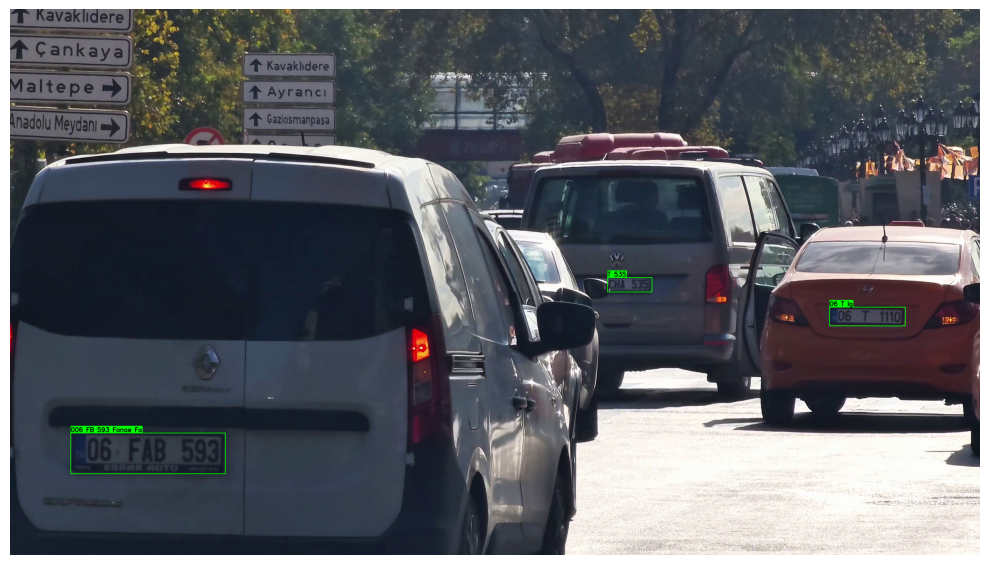


Plate 1: 006 FB 593 Fanae Fa (Confidence: 40.10%)
Plate 2: 06 T Ig (Confidence: 49.82%)
Plate 3: T 535 (Confidence: 19.88%)

Total plates detected: 3
Average confidence: 36.60%


In [44]:
frame_path = r"traffic_dataset_frames\traffic_1_frame_000440_t7.33s_000021.jpg"
easyocr_on_frame(frame_path)

### **Inference on a Video**

In [45]:
def easyocr_pipeline(video_path, output_path, model_path=MODEL_PATH):
    """
    Process a video to detect license plates using YOLO and recognize text using EasyOCR.
    Annotates the video with bounding boxes and recognized text.
    Maintains the highest confidence OCR result for each tracked object.
    """
    if not os.path.exists(video_path):
        print(f"Error: Video path not found: {video_path}")
        return
    if not os.path.exists(model_path):
        print(f"Error: Model path not found: {model_path}")
        return

    print("Initializing EasyOCR...")
    reader = easyocr.Reader(['en'], gpu=False)
    print("EasyOCR initialized successfully!")

    # Load model
    print(f"Loading model from {model_path}...")
    model = YOLO(model_path)
    
    # Capture video
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Setup video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print(f"Processing video: {video_path}")
    print(f"Output will be saved to: {output_path}")

    # Dictionary to store highest confidence OCR results for each tracked object
    # Key: track_id, Value: {'text': str, 'confidence': float}
    tracked_ocr_results = {}

    # Process frames
    # Use streaming to avoid OOM
    results = model.track(video_path, stream=True, verbose=False, conf=0.4, persist=True)
    
    for i, result in tqdm(enumerate(results), total=total_frames):
        frame = result.orig_img
        
        if result.boxes is not None and len(result.boxes) > 0:
            for box in result.boxes:
                # Get bounding box coordinates
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                
                # Get tracking ID (if available)
                track_id = None
                if box.id is not None:
                    track_id = int(box.id[0])
                
                # Crop number plate
                # Ensure coordinates are within frame bounds
                x1, y1 = max(0, x1), max(0, y1)
                x2, y2 = min(width, x2), min(height, y2)
                
                plate_img = frame[y1:y2, x1:x2]
                
                if plate_img.size == 0:
                    continue
                
                current_text = ""
                current_confidence = 0.0
                
                # Run EasyOCR on every frame
                try:
                    # EasyOCR returns: [([bbox], text, confidence), ...]
                    ocr_results = reader.readtext(plate_img)
                    
                    # Extract text and calculate average confidence
                    if ocr_results:
                        text_parts = []
                        confidences = []
                        
                        for detection in ocr_results:
                            # Each detection is: (bbox, text, confidence)
                            if len(detection) >= 3:
                                bbox, text, conf = detection
                                if text and text.strip():
                                    text_parts.append(text.strip())
                                    confidences.append(float(conf))
                        
                        if text_parts:
                            current_text = ' '.join(text_parts)
                            current_confidence = sum(confidences) / len(confidences)
                        
                except Exception as e:
                    # Silently handle OCR errors to avoid cluttering output
                    current_text = ""
                    current_confidence = 0.0
                
                # Update tracked OCR results if we have a tracking ID
                display_text = current_text
                if track_id is not None:
                    if track_id not in tracked_ocr_results:
                        # First time seeing this track_id
                        if current_text:
                            tracked_ocr_results[track_id] = {
                                'text': current_text,
                                'confidence': current_confidence
                            }
                            display_text = current_text
                        else:
                            display_text = ""
                    else:
                        # We've seen this track_id before
                        if current_confidence > tracked_ocr_results[track_id]['confidence'] and current_text:
                            # Update with higher confidence result
                            tracked_ocr_results[track_id] = {
                                'text': current_text,
                                'confidence': current_confidence
                            }
                            display_text = current_text
                        else:
                            # Keep the existing highest confidence result
                            display_text = tracked_ocr_results[track_id]['text']
                
                # Draw bbox
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                
                # Draw text above bbox
                if display_text:
                    # Calculate text background size
                    (text_w, text_h), baseline = cv2.getTextSize(display_text, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)
                    
                    # Draw text background (above the box)
                    # Ensure background doesn't go off-screen
                    bg_x1 = x1
                    bg_y1 = max(0, y1 - text_h - 10)
                    bg_x2 = min(width, x1 + text_w)
                    bg_y2 = max(0, y1)
                    
                    cv2.rectangle(frame, (bg_x1, bg_y1), (bg_x2, bg_y2), (0, 255, 0), -1)
                    
                    # Put text
                    text_x = x1
                    text_y = max(int(text_h), y1 - 5)
                    cv2.putText(frame, display_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
        
        # Write frame to video
        out.write(frame)
        
    # Release resources
    out.release()
    cap.release()
    cv2.destroyAllWindows()
    print("Video processing complete.")

In [ ]:
video_path = r"traffic_dataset\traffic_3.mp4"
easyocr_pipeline(video_path, "traffic_3_result.mp4")

---

## 👨‍💻 About Labellerr's Hands-On Learning in Computer Vision

Thank you for exploring this **Labellerr Hands-On Computer Vision Cookbook**! We hope this notebook helped you learn, prototype, and accelerate your vision projects.  
Labellerr provides ready-to-run Jupyter/Colab notebooks for the latest models and real-world use cases in computer vision, AI agents, and data annotation.

---
## 🧑‍🔬 Check Our Popular Youtube Videos

Whether you're a beginner or a practitioner, our hands-on training videos are perfect for learning custom model building, computer vision techniques, and applied AI:

- [How to Fine-Tune YOLO on Custom Dataset](https://www.youtube.com/watch?v=pBLWOe01QXU)  
  Step-by-step guide to fine-tuning YOLO for real-world use—environment setup, annotation, training, validation, and inference.
- [Build a Real-Time Intrusion Detection System with YOLO](https://www.youtube.com/watch?v=kwQeokYDVcE)  
  Create an AI-powered system to detect intruders in real time using YOLO and computer vision.
- [Finding Athlete Speed Using YOLO](https://www.youtube.com/watch?v=txW0CQe_pw0)  
  Estimate real-time speed of athletes for sports analytics.
- [Object Counting Using AI](https://www.youtube.com/watch?v=smsjBBQcIUQ)  
  Learn dataset curation, annotation, and training for robust object counting AI applications.
---

## 🎦 Popular Labellerr YouTube Videos

Level up your skills and see video walkthroughs of these tools and notebooks on the  
[Labellerr YouTube Channel](https://www.youtube.com/@Labellerr/videos):

- [How I Fixed My Biggest Annotation Nightmare with Labellerr](https://www.youtube.com/watch?v=hlcFdiuz_HI) – Solving complex annotation for ML engineers.
- [Explore Your Dataset with Labellerr's AI](https://www.youtube.com/watch?v=LdbRXYWVyN0) – Auto-tagging, object counting, image descriptions, and dataset exploration.
- [Boost AI Image Annotation 10X with Labellerr's CLIP Mode](https://www.youtube.com/watch?v=pY_o4EvYMz8) – Refine annotations with precision using CLIP mode.
- [Boost Data Annotation Accuracy and Efficiency with Active Learning](https://www.youtube.com/watch?v=lAYu-ewIhTE) – Speed up your annotation workflow using Active Learning.

> 👉 **Subscribe** for Labellerr's deep learning, annotation, and AI tutorials, or watch videos directly alongside notebooks!

---

## 🤝 Stay Connected

- **Website:** [https://www.labellerr.com/](https://www.labellerr.com/)
- **Blog:** [https://www.labellerr.com/blog/](https://www.labellerr.com/blog/)
- **GitHub:** [Labellerr/Hands-On-Learning-in-Computer-Vision](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)
- **LinkedIn:** [Labellerr](https://in.linkedin.com/company/labellerr)
- **Twitter/X:** [@Labellerr1](https://x.com/Labellerr1)

*Happy learning and building with Labellerr!*
